### Limpieza de datos

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os

In [4]:
ruta = 'c:\\Users\\ps.escobar\\OneDrive - Universidad de los andes\\Documentos\\GitHub\\predicting_poverty_bdmc'
print(os.getcwd())

#'c:\\Users\\ps.escobar\\OneDrive - Universidad de los andes\\Documentos\\GitHub\\predicting_poverty_bdmc'

c:\Users\ps.escobar\OneDrive - Universidad de los andes\Documentos\GitHub\predicting_poverty_bdmc


In [5]:
#Amrimos las bases de datos
tr_p = pd.read_csv(ruta+'\\stores\\train_personas.csv')
ts_p = pd.read_csv(ruta+'\\stores\\test_personas.csv')
tr_h = pd.read_csv(ruta+'\\stores\\train_hogares.csv')
ts_h = pd.read_csv(ruta+'\\stores\\test_hogares.csv')

In [7]:
tr_p.head()

,id,Orden,Clase,Dominio,Estrato1,P6020,P6040,P6050,P6090,P6100,...,Iof2es,Iof3hes,Iof3ies,Iof6es,Ingtotob,Ingtotes,Ingtot,Fex_c,Depto,Fex_dpto
0,8d0193e328305a042001a35f,2,1,MEDELLIN,2,2,38,2,1.0,1.0,...,NaN,NaN,NaN,NaN,1.109190e+06,NaN,1.109190e+06,127.222038,5,146.25179
1,8d0193e328305a042001a35f,5,1,MEDELLIN,2,1,3,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.222038,5,146.25179
2,8d0193e328305a042001a35f,1,1,MEDELLIN,2,1,41,1,1.0,1.0,...,NaN,NaN,NaN,NaN,1.399140e+06,NaN,1.399140e+06,127.222038,5,146.25179
3,8d0193e328305a042001a35f,4,1,MEDELLIN,2,1,3,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.222038,5,146.25179
4,8d0193e328305a042001a35f,3,1,MEDELLIN,2,1,11,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.222038,5,146.25179


<Axes: >

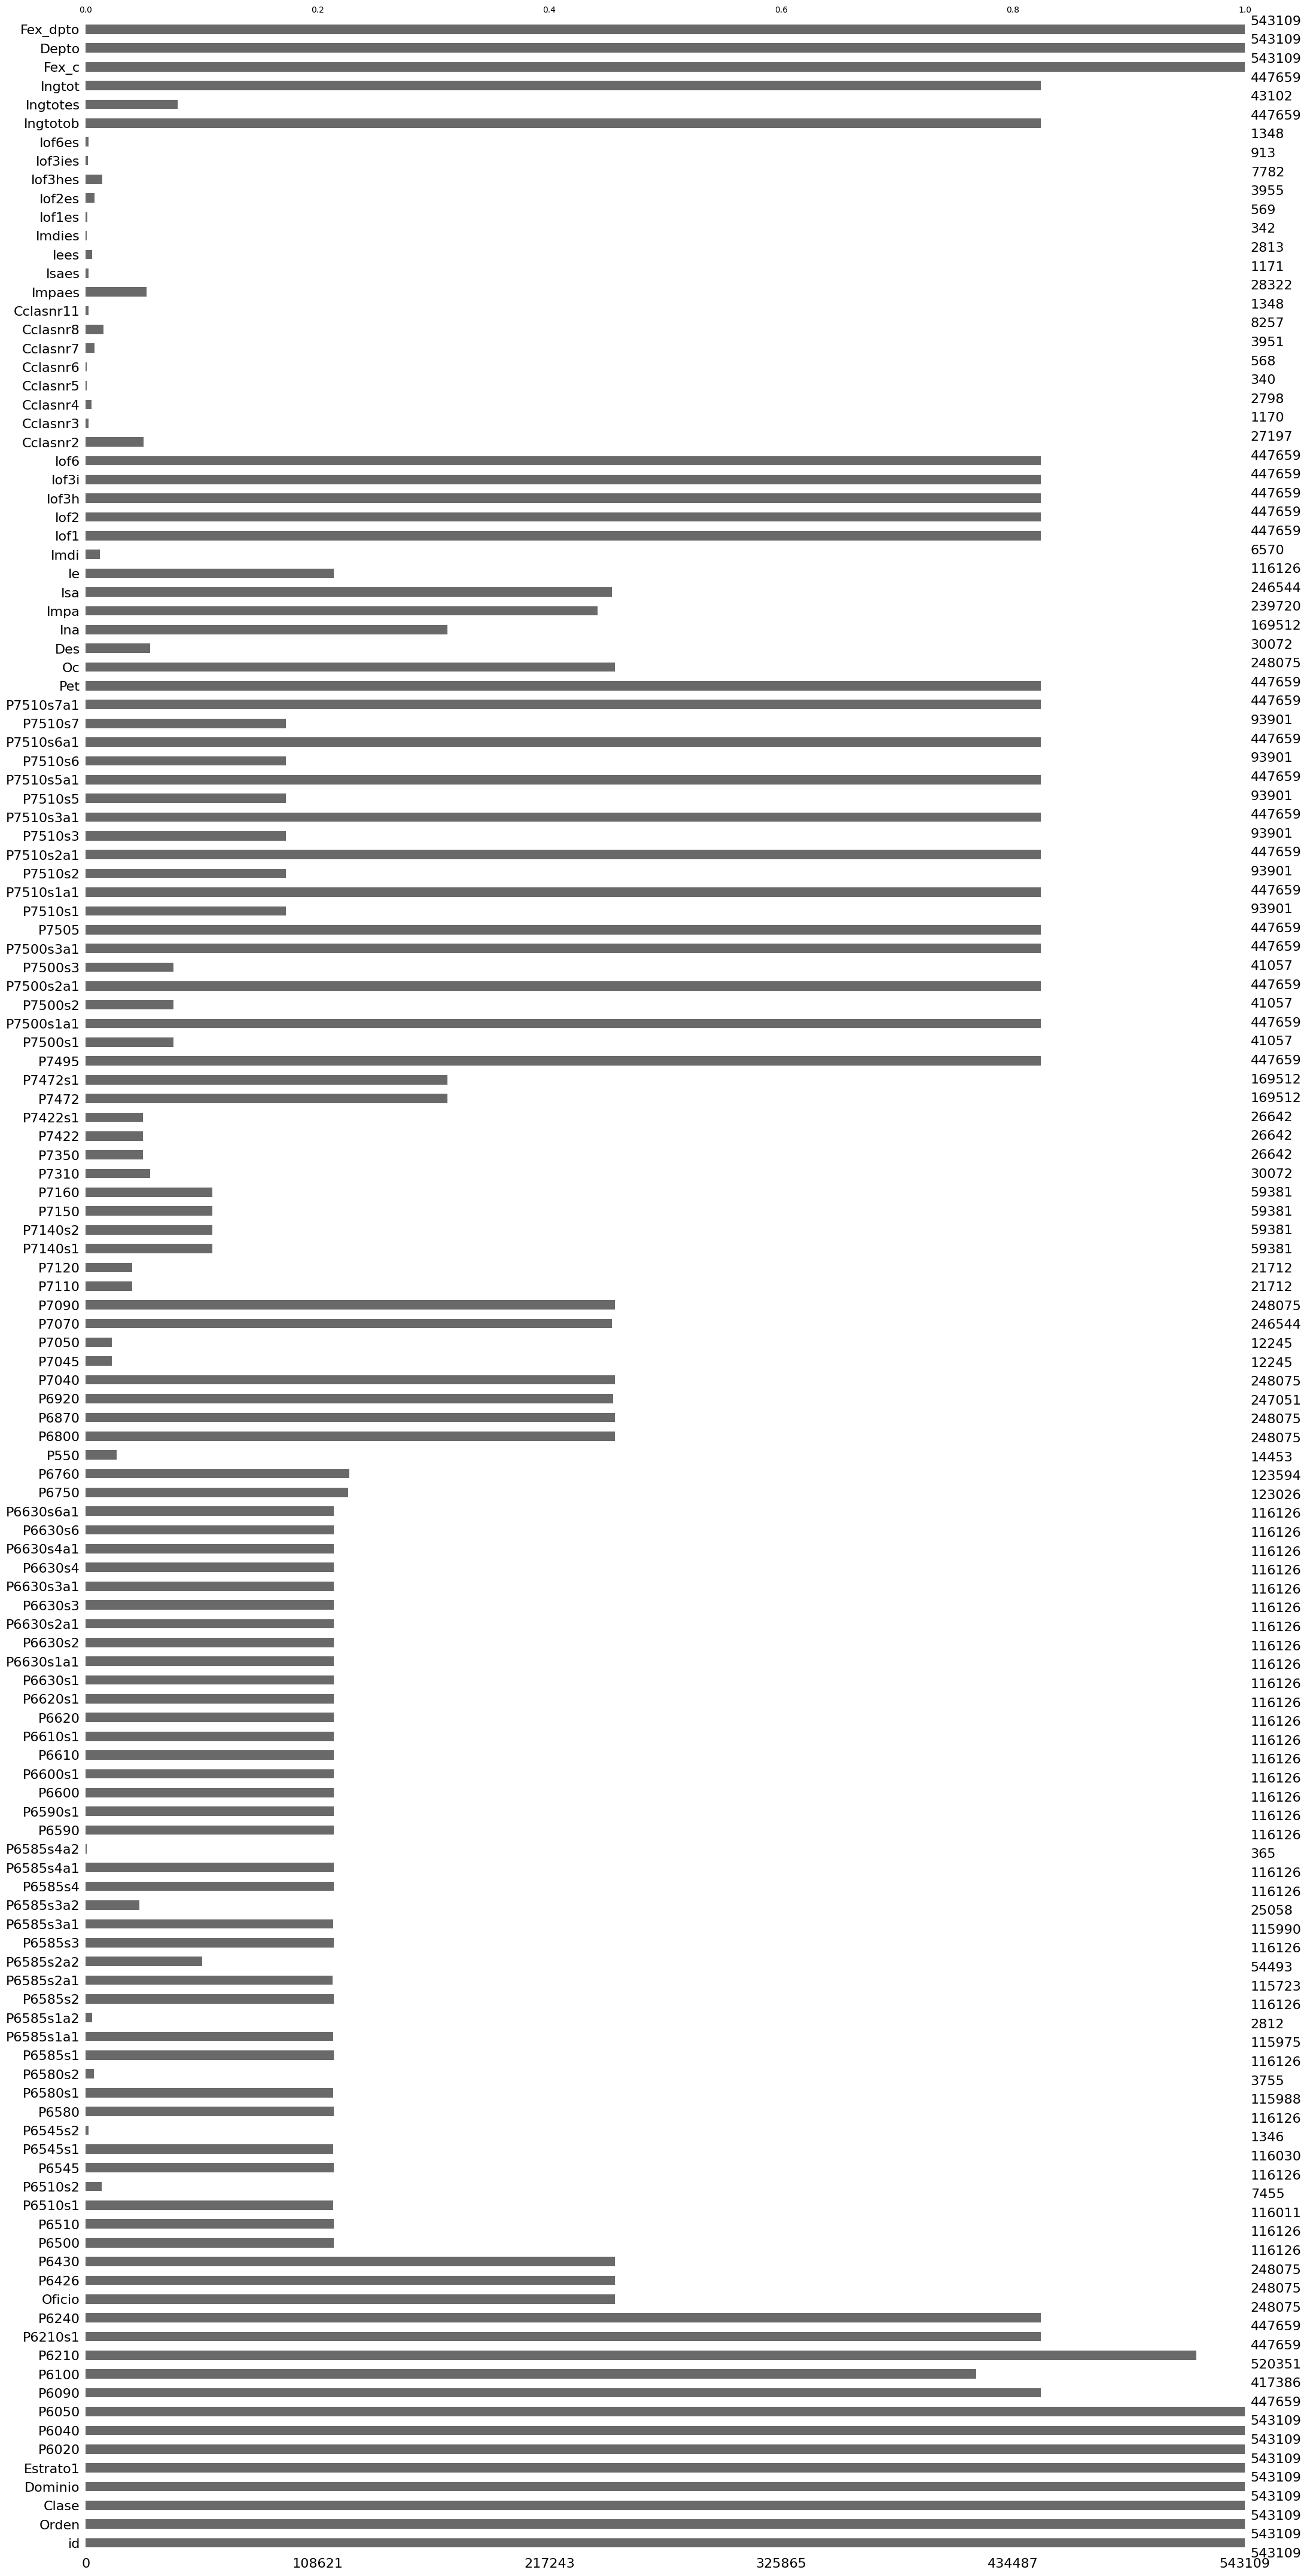

In [14]:
msno.bar(tr_p)

<Axes: >

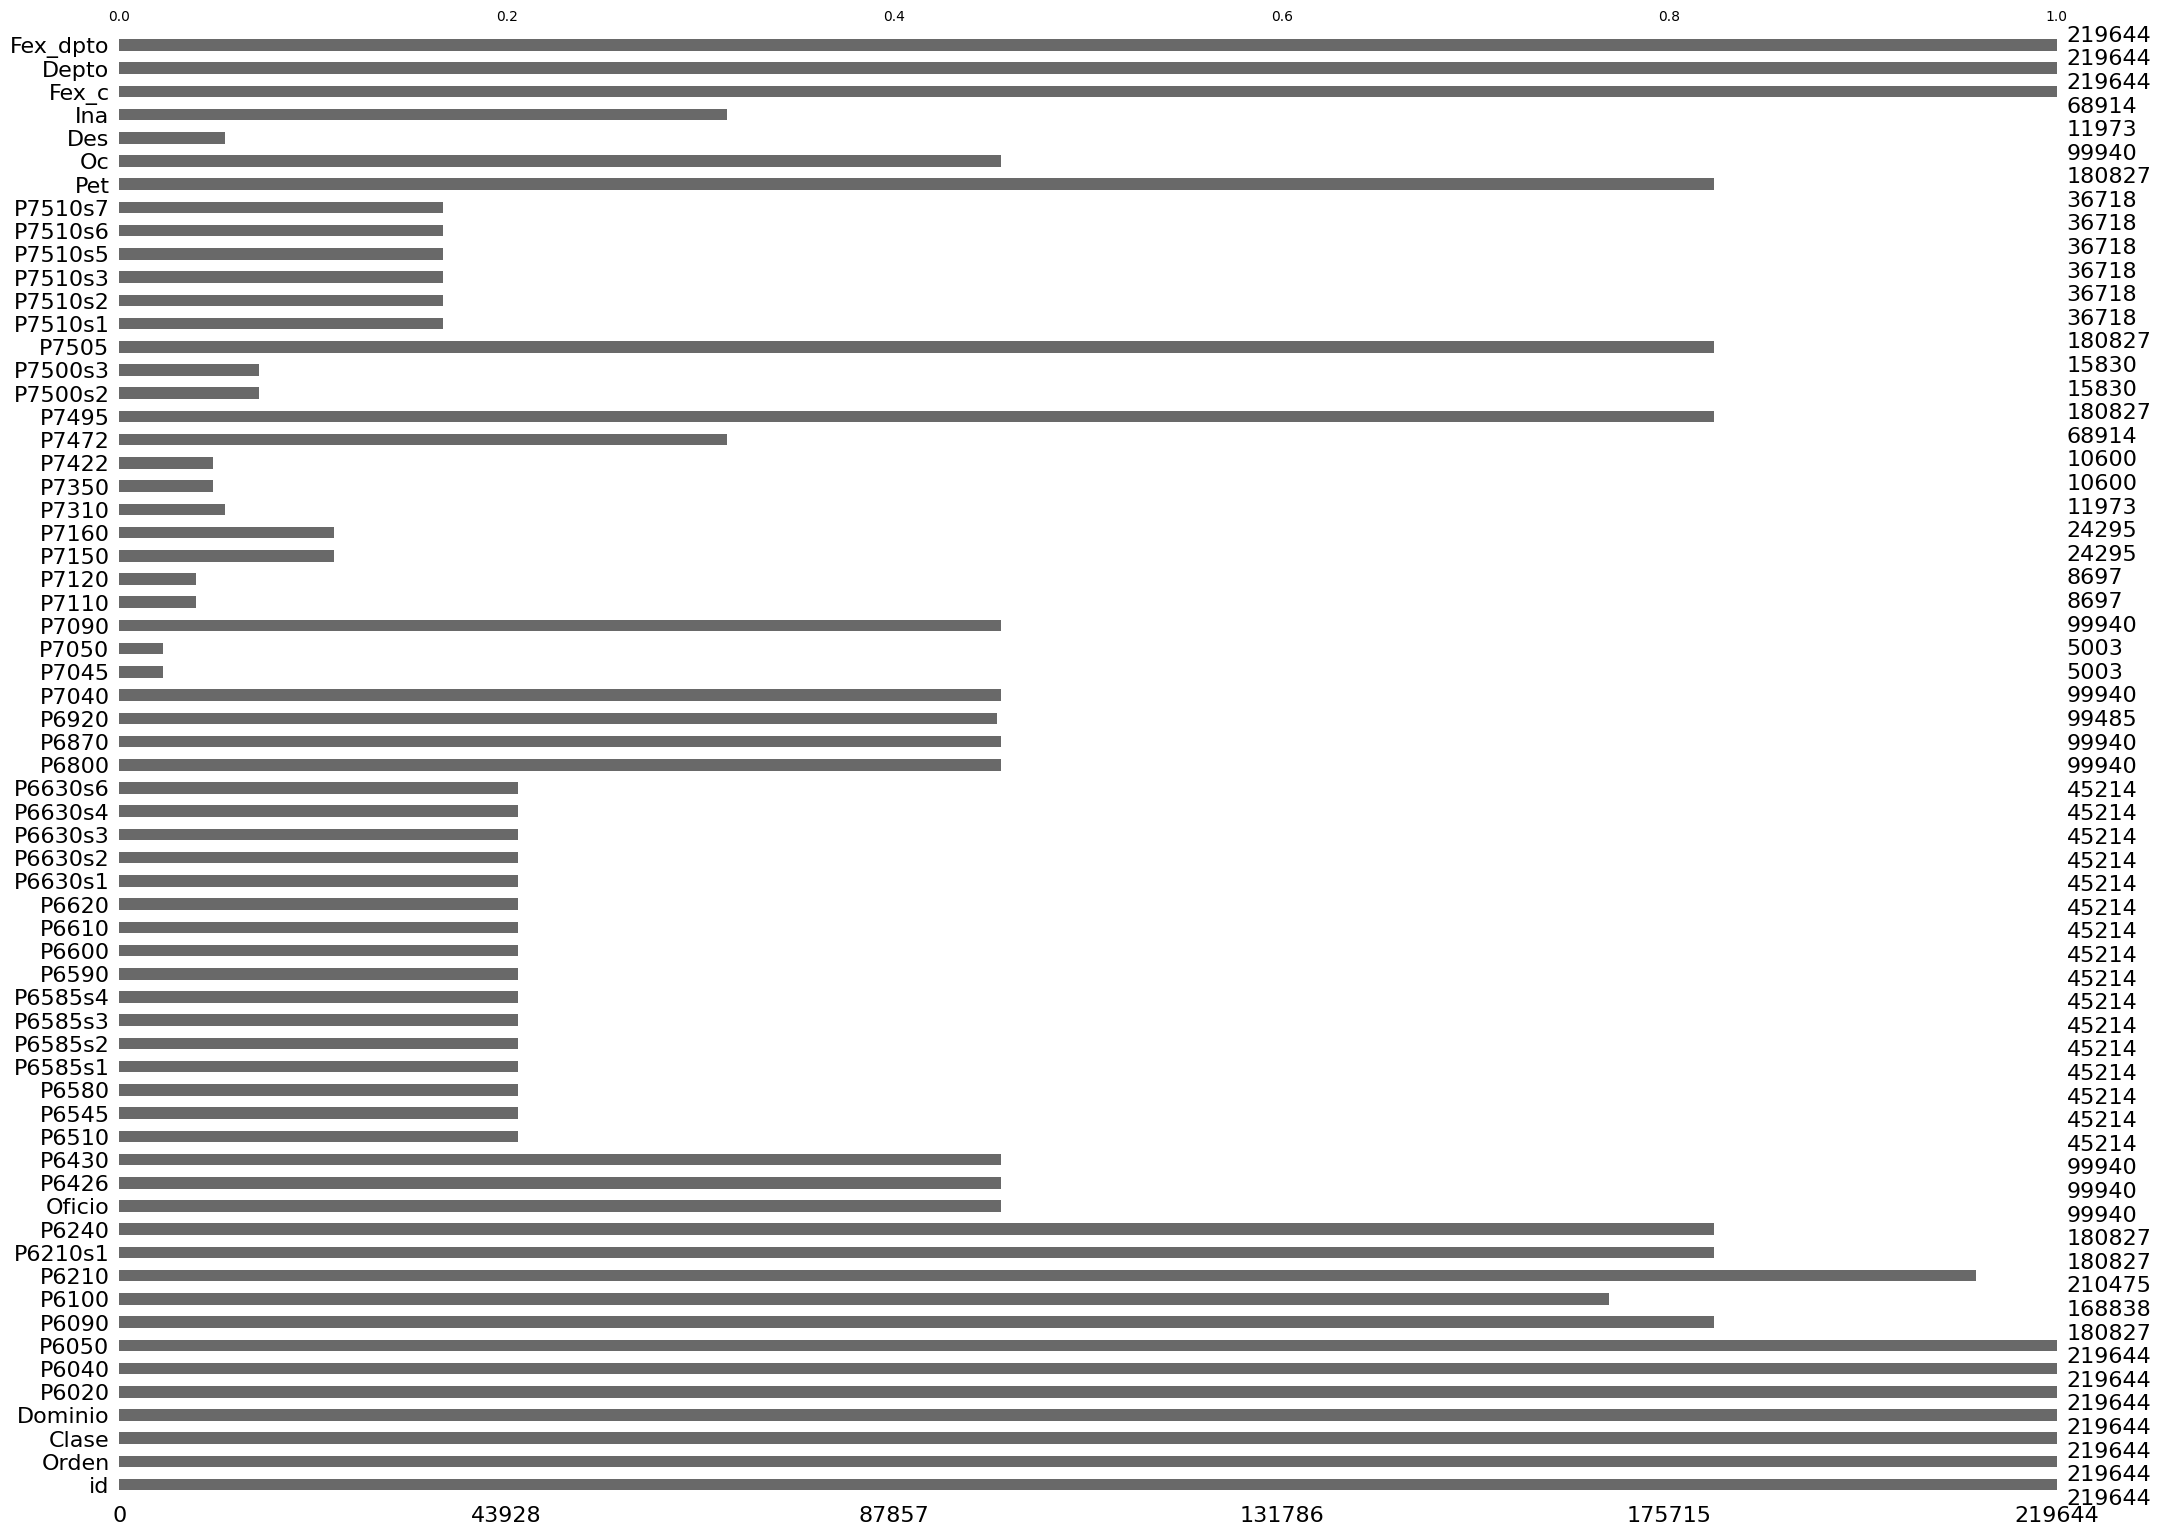

In [15]:
msno.bar(ts_p)

<Axes: >

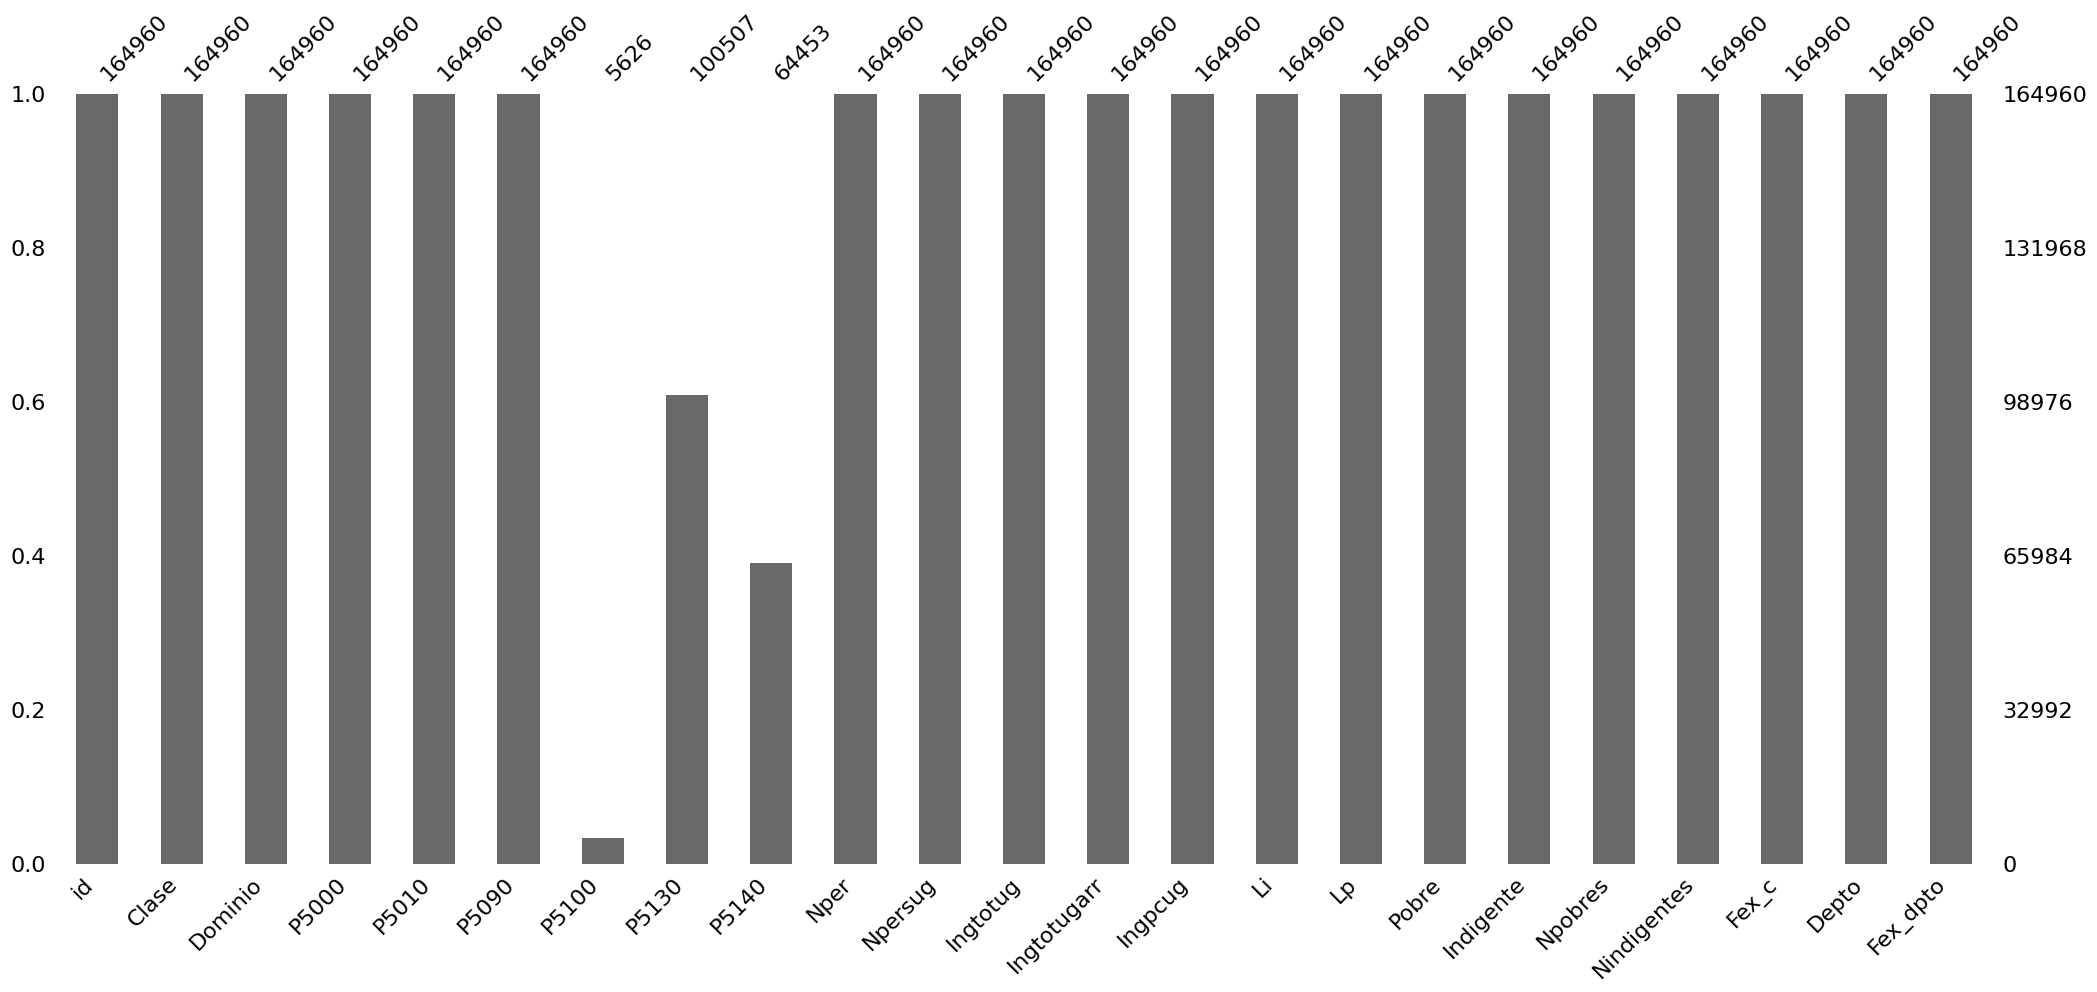

In [16]:
msno.bar(tr_h)

<Axes: >

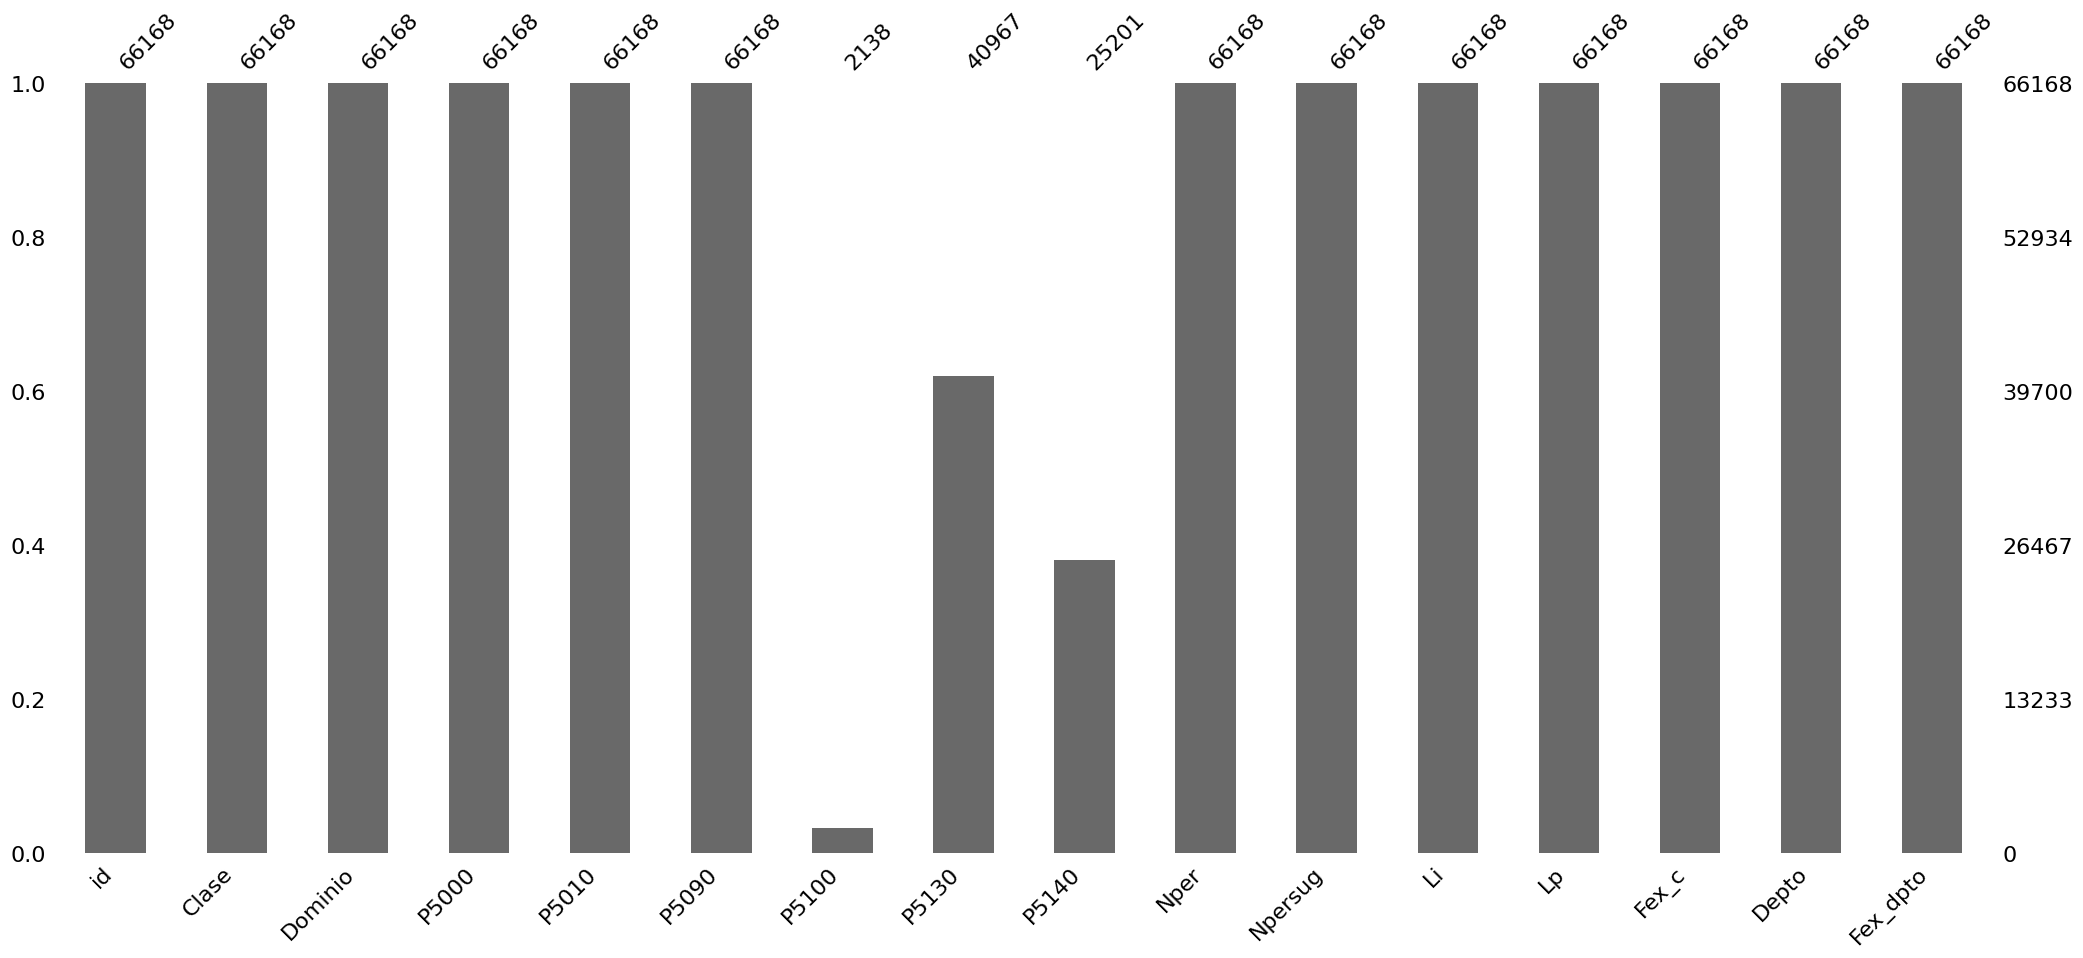

In [17]:
msno.bar(ts_h)

##### Tenemos problemas con missing values
##### Vamos a ver si estos tienen un alto grado de correlación

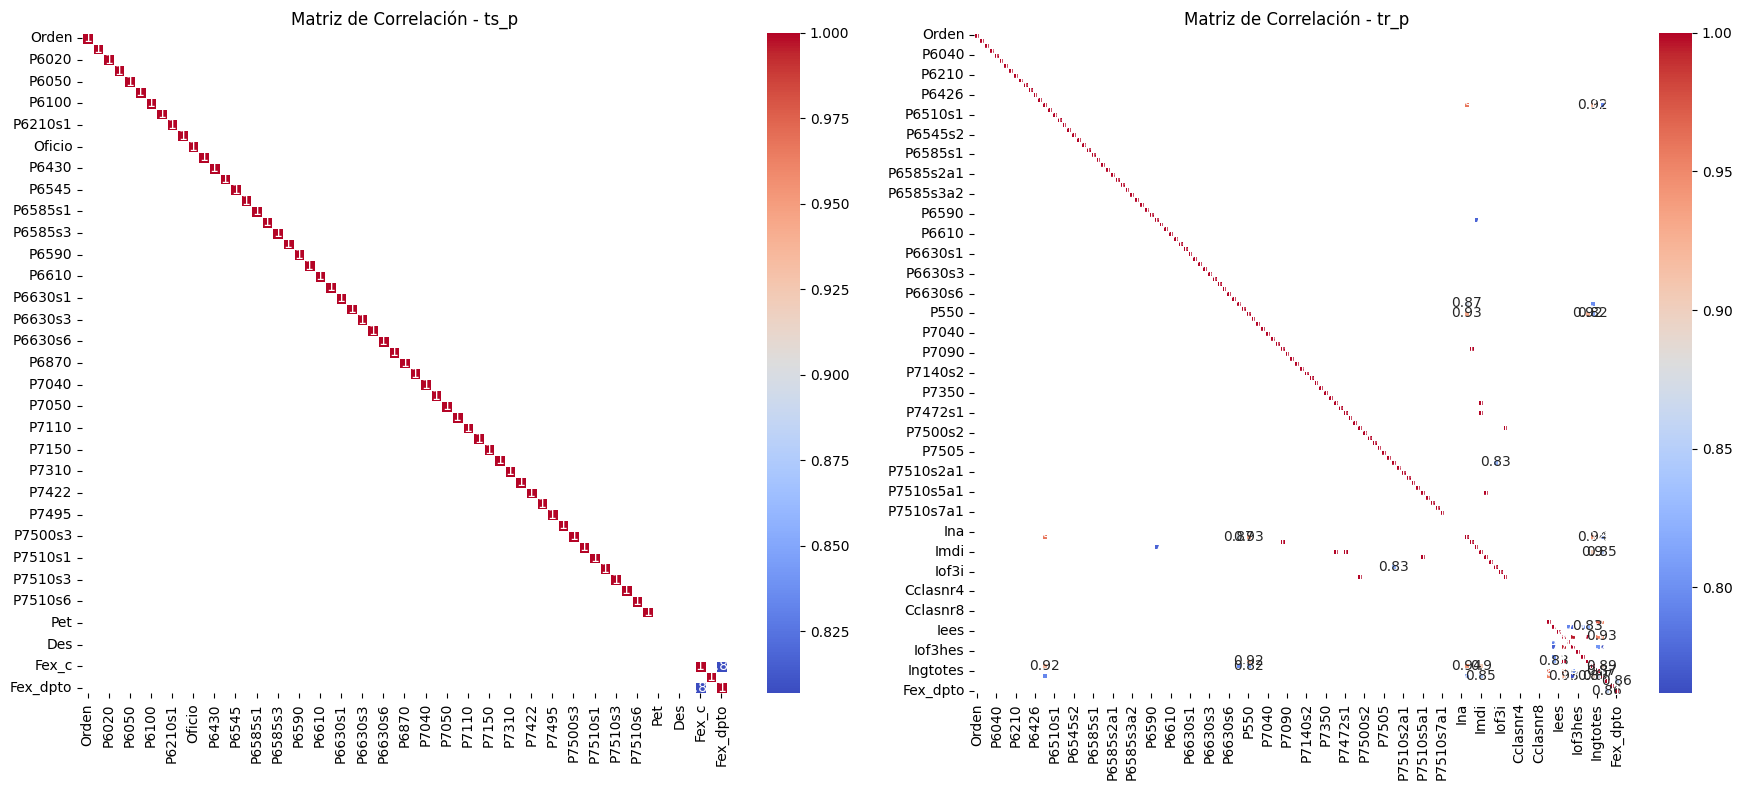

In [29]:
numeric_var_ts_p = ts_p.select_dtypes(include = 'number')
cor_matrix_ts_p = numeric_var_ts_p.corr()
tsp_cor_matrix = cor_matrix_ts_p[cor_matrix_ts_p > 0.75]

numeric_var_tr_p = tr_p.select_dtypes(include = 'number')
cor_matrix_tr_p = numeric_var_tr_p.corr()
trp_cor_matrix = cor_matrix_tr_p[cor_matrix_tr_p > 0.75]

fig, axes = plt.subplots(1, 2, figsize = (18, 8))

#Grafico para ts_p
sns.heatmap(tsp_cor_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, ax = axes[0])
axes[0].set_title('Matriz de Correlación - ts_p')

#Grafico para tr_p
sns.heatmap(trp_cor_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, ax = axes[1])
axes[1].set_title('Matriz de Correlación - tr_p')

#Ajusta y muestra la figura
plt.tight_layout()
plt.show()

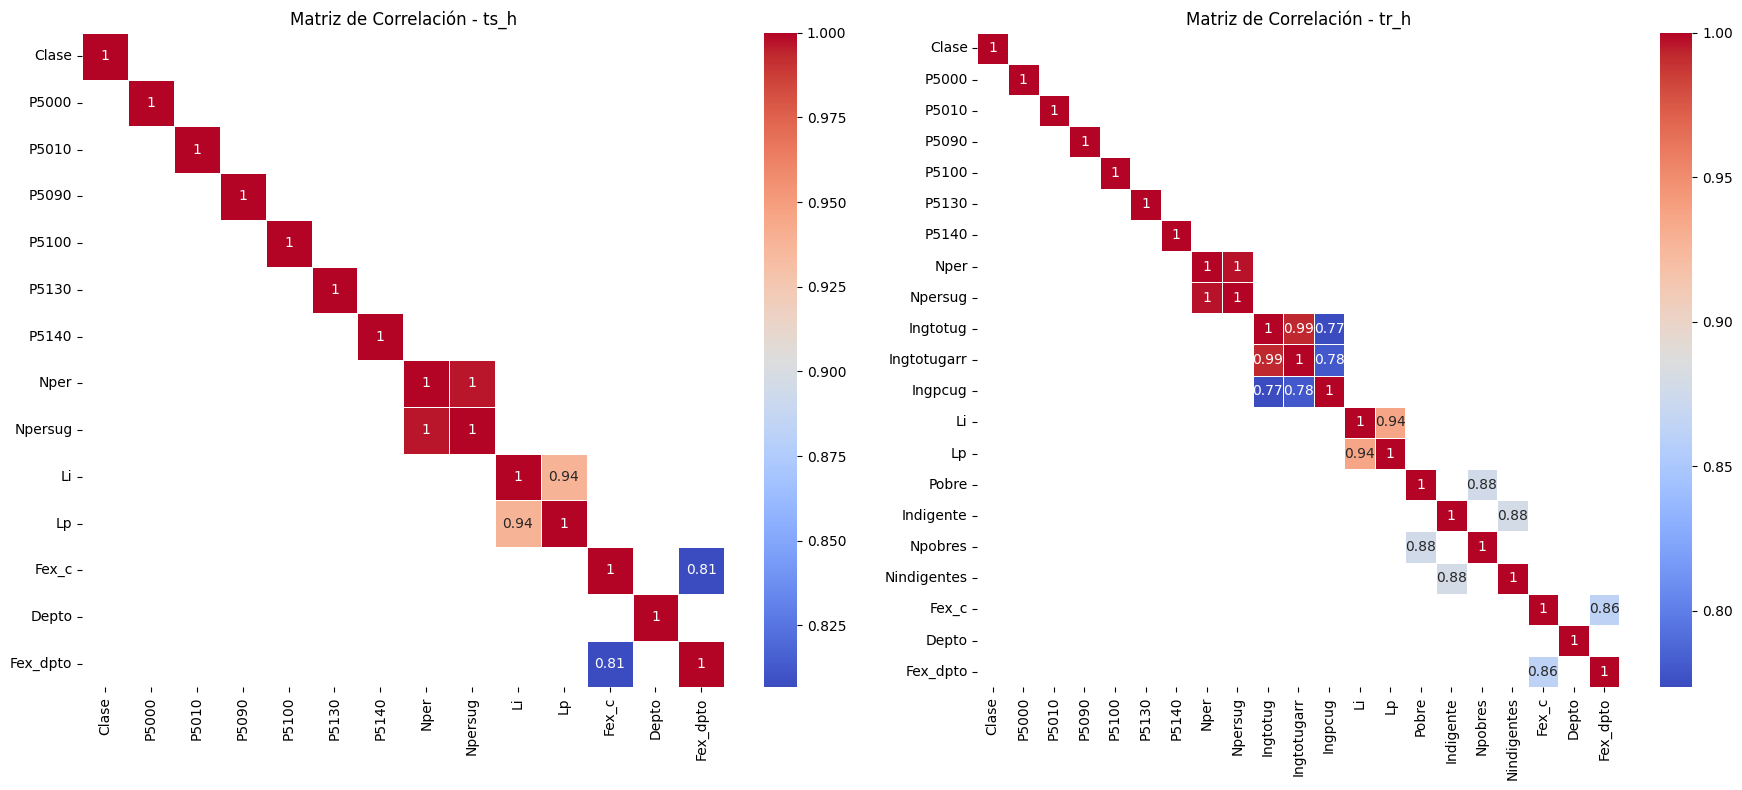

In [30]:
numeric_var_ts_h = ts_h.select_dtypes(include = 'number')
cor_matrix_ts_h = numeric_var_ts_h.corr()
tsh_cor_matrix = cor_matrix_ts_h[cor_matrix_ts_h > 0.75]

numeric_var_tr_h = tr_h.select_dtypes(include = 'number')
cor_matrix_tr_h = numeric_var_tr_h.corr()
trh_cor_matrix = cor_matrix_tr_h[cor_matrix_tr_h > 0.75]

fig, axes = plt.subplots(1, 2, figsize = (18, 8))

#Grafico para ts_p
sns.heatmap(tsh_cor_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, ax = axes[0])
axes[0].set_title('Matriz de Correlación - ts_h')

#Grafico para tr_p
sns.heatmap(trh_cor_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, ax = axes[1])
axes[1].set_title('Matriz de Correlación - tr_h')

#Ajusta y muestra la figura
plt.tight_layout()
plt.show()

Algunas variables tienen missing values bastante correlacionados entre ellos